# Linear & Non-linear Regression
---

In this notebook, simple examples of linear and non-linear regression will be presented to illustrate how choosing different types of features can give way to better curves to fit the data.

---

First, let us load some libraries we will be using.

In [1]:
#Some libraries that we will be using.
from __future__ import print_function, division
import numpy as np
from IPython import display
import math

#Configure the matplotlib backend as plotting inline
%matplotlib inline
import matplotlib.pyplot as plt

#Enables latex
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size':'20'})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

---

For the linear and non-linear regression cases presented below, we denote a data point as $\mathbf{x} = (x_{1},...x_{D})$ where $x_{d}$, the elements of $\mathbf{x}$ represent the features of the data point.

The dataset then consists of pairs of these input data-points and real-valued outputs of the form:

$$
\mathcal{D} = \{(\mathbf{x}^{(1)}, y^{(1)}), ..., (\mathbf{x}^{(N)}, y^{(N)})\}
$$

where $y^{(n)} \in \Re$

The goal of regression is then to predict the output with accuracy given a new input.

---
## 1. Linear Regression
---

In this 1-D regression example, we assume a linear Gaussian model of the form:

$$
y^{(n)} = ax^{(n)} + b + \epsilon^{(n)}
$$

where $\epsilon^{(n)} \sim \mathcal{N}(0,\sigma^{2})$ is modelling noise.

The question then becomes: how do we estimate the parameters $\theta = (a,b,\sigma^{2})$ of the model to best fit the data?

A simple way to do this would be to maximise the probability of the data given $\theta$ i.e. for observations $\mathbf{y} = (y^{(1)}, ..., y^{(N)})$ and data-points $\mathbf{x} = (x^{(1)}, ..., x^{(N)})$, the optimal parameters are found by maximising $P(\mathbf{y}|\mathbf{x},\theta)$, which is known as the \textbf{likelihood} of the parameters $\theta$.

If we let $\tilde{\mathbf{x}}^{(n)} = \begin{pmatrix} x^{(n)} \\ 1 \end{pmatrix}$ and $\mathbf{\beta} = \begin{pmatrix} a \\ b \end{pmatrix}$ such that $y^{(n)} = \mathbf{\beta}^{T}\tilde{\mathbf{x}} + \epsilon^{(n)}$, the maximum likelihood parameters turn out to be a least-squares solution to the equation $\mathbf{X}\beta = \mathbf{y}$, where $\mathbf{X}$ is known as the data matrix whereby each row is a data point ($\tilde{\mathbf{x}}^{(n)}$). This then gives the following solution for $\beta$:

$$
\beta_{ML} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}
$$

The maximum likelihood noise variance $\sigma_{ML}^{2}$ is then given as:

$$
\sigma_{ML}^{2} = \frac{(\mathbf{y}-\mathbf{X}\beta)^{T}(\mathbf{y}-\mathbf{X}\beta)}{N}
$$

The code below then simply implements these equations to obtain ML parameter estimates and these are then compared to the true parameters.


ML params:  [ 1.14382282 -1.06362909]
True params:  [ 1.         -0.64789217]
ML variance:  1.18160184072
True variance:  1.0
MSE:  1.18160184072
MSE for true:  1.22872235528


/Users/jaduol/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


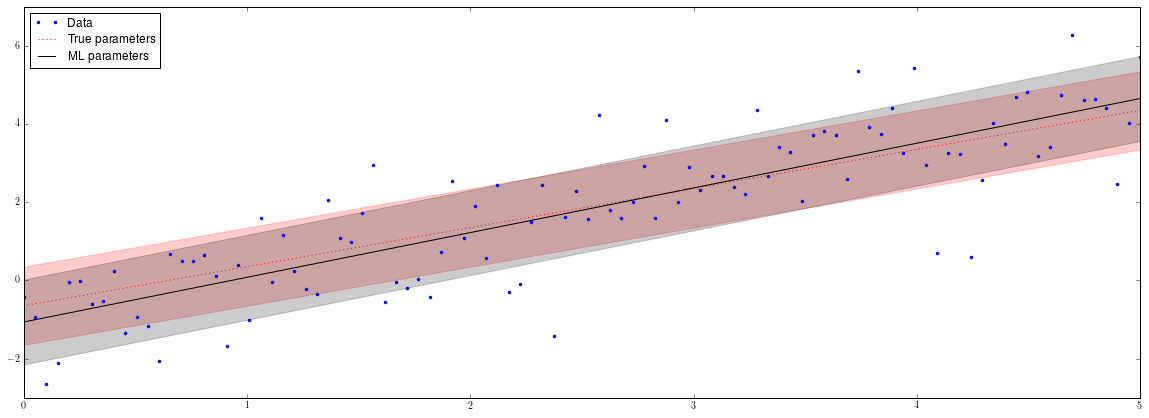

In [8]:
N = 100   #Number of points

#Generate some sample data from a linear model
true_Beta = np.array([1,np.random.randn()])
true_sigma = 1.                                
x = np.append(np.linspace(0,5,N).reshape(-1,1),np.ones((N,1)),axis=1)
y = np.dot(x,true_Beta) + true_sigma*np.random.randn(N)

#Calculate ML parameters
ML_Beta = np.dot(np.linalg.pinv(x),y)
ML_sigma = np.linalg.norm(y-np.dot(x,ML_Beta))/(N**0.5)

#Generate true and ML observations
y_true = np.dot(x,true_Beta)
y_ML = np.dot(x,ML_Beta)

print("ML params: ",ML_Beta)
print("True params: ",true_Beta)
print("ML variance: ",ML_sigma**2)
print("True variance: ",true_sigma**2)
print("MSE: ",(np.linalg.norm(y_ML-y)**2)/len(y))
print("MSE for true: ",(np.linalg.norm(y_true-y)**2)/len(y))

fig, ax = plt.subplots()
fig.set_size_inches(20,7)
ax.plot(x[:,0],y,'b.',label=r'Data')
ax.plot(x[:,0],y_true,color='r',ls=':',label=r'True parameters')
ax.fill_between(x[:,0],y_true-true_sigma,y_true+true_sigma,color='r',alpha=0.2)
ax.plot(x[:,0],y_ML,color='k',ls='-',label=r'ML parameters')
ax.fill_between(x[:,0],y_ML-ML_sigma,y_ML+ML_sigma,color='k',alpha=0.2)
ax.legend(loc=0)
fig.show()

---
## 2. Non-linear Regression
---

The simple solutions given by the 1-D linear regression model can be applied to a wide range of non-linear models where $\mathbf{x}^{(n)}$ is simply replaced with some non-linear function of the inputs, $\phi(\mathbf{x}^{(n)})$ i.e.

$$
y^{(n)} = \beta^{T}\phi(\mathbf{x}^{(n)}) + \epsilon^{(n)}
$$

where $\phi(\mathbf{x}^{(n)}) = [1, \phi_{1}(\mathbf{x}^{(n)}), \cdots, \phi_{K}(\mathbf{x}^{(n)})]^{T}$ and $K$ denotes the number of basis functions for each data-point. 

This non-linear mapping allows more complicated functions to be fit to the data and thus offers greater variability as to the type of data that can be modelled.

The two examples given below are those that use \textbf{polynomial features} where $\phi(\mathbf{x}^{(n)}) = [ 1,x^{(n)},x^{(n)^{2}},\cdots,x^{(n)^{d}}]^{T}$ and \textbf{Gaussian radial basis functions} (RBFs) where $\newcommand{\norm}[1]{\left\lVert#1\right\rVert} \phi_{k}(\mathbf{x}^{(n)}) = \exp(-\frac{1}{2s_{k}}\norm{\mathbf{x}^{(n)} - \mathbf{c}_{k}}^{2})$ and $\mathbf{c}_{k}$ and $s_{k}$ are the mean and width, respectively, of the basis function.

---

Firstly, we define the functions to evaluate the polynomial and RBF features.

In [4]:
def evalRBF(x,c,s):
    """
        Evaluates the Radial Basis Function (RBF).
        
        Arguments:
            x - data point at which to evaluate RBF
            c - mean of RBF
            s - width of RBF
    """
    
    return np.exp(-(1/(2*s))*np.linalg.norm(x-c)**2)

def evalPower(x,n):
    """
        Calculates the nth power of x 
    """
    
    return x**n

The following code then generates data from a linear model and finds the ML parameters for given basis functions. 

ML parameters:  [  6.49038060e+08  -5.67249530e+09   2.35621879e+10  -6.03380746e+10
   1.01524217e+11  -1.03323161e+11   2.06574730e+10   1.36367501e+11
  -2.76058729e+11   2.78823338e+11  -9.95417013e+10  -1.79536114e+11
   4.05704645e+11  -4.72283476e+11   3.86110347e+11  -2.35271243e+11
   1.06679642e+11  -3.45044503e+10   7.17923055e+09  -7.28151207e+08]
ML variance:  0.691082052894
True variance:  1.0
MSE:  8.31313450447
MSE for true:  9.33358289176


/Users/jaduol/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


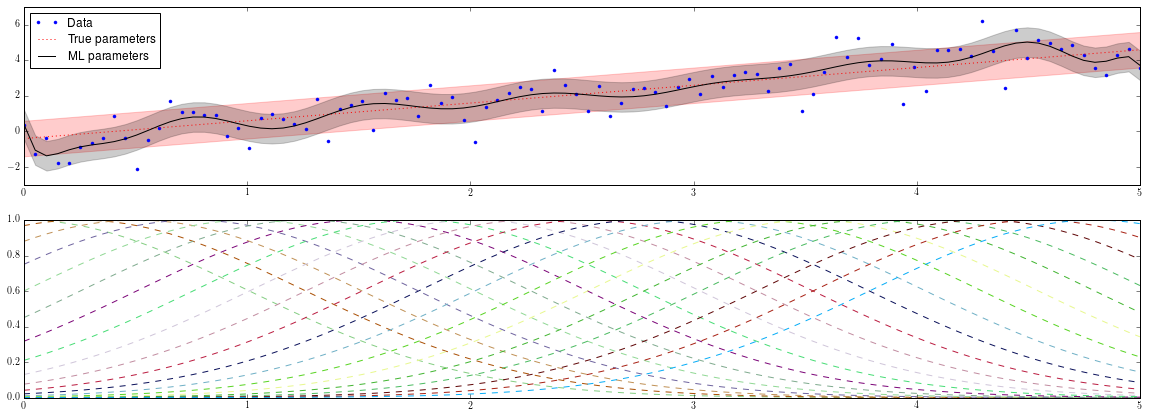

In [6]:
N = 100   #Number of points
K = 20    #Number of bases functions (RBF) or 'order+1' of polynomial bases

#Generate some sample data from a linear model
true_Beta = np.array([1,np.random.randn()])
true_sigma = 1.                                
x = np.append(np.linspace(0,5,N).reshape(-1,1),np.ones((N,1)),axis=1)
y = np.dot(x,true_Beta) + true_sigma*np.random.randn(N)

#Calculate basis parameters (only for RBFs)
widths = np.ones(K)     #Radial basis function widths
means = x[::N//K,0]     #Radial basis function means


Phi_x = np.zeros((N,K))     #Non-linear features

#Evaluate features
v_evalRBF = np.vectorize(evalRBF,otypes=[np.float])
#v_evalPoly = np.vectorize(evalPower,otypes=[np.float])
for k in range(K):
    Phi_x[:,k] = v_evalRBF(x[:,0],means[k],widths[k])
    #Phi_x[:,k] = v_evalPoly(x[:,0],k)
     

#Calculate ML parameters
ML_Beta = np.dot(np.linalg.pinv(Phi_x),y)
ML_sigma = np.linalg.norm(y-np.dot(Phi_x,ML_Beta))/(N**0.5)

#True and ML observations (y)
y_true = np.dot(x,true_Beta)
y_ML = np.dot(Phi_x,ML_Beta)

print("ML parameters: ", ML_Beta)
print("ML variance: ",ML_sigma**2)
print("True variance: ",true_sigma**2)
print("MSE: ",np.linalg.norm(y_ML-y))
print("MSE for true: ",np.linalg.norm(y_true-y))

#Plot data with true and ML functions
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(20,7)
ax1.plot(x[:,0],y,'b.',label=r'Data')
ax1.plot(x[:,0],y_true,color='r',ls=':',label=r'True parameters')
ax1.fill_between(x[:,0],y_true-true_sigma,y_true+true_sigma,color='r',alpha=0.2)
ax1.plot(x[:,0],y_ML,color='k',ls='-',label=r'ML parameters')
ax1.fill_between(x[:,0],y_ML-ML_sigma,y_ML+ML_sigma,color='k',alpha=0.2)
ax1.legend(loc=0)

#### ONLY FOR RBFS - Uncomment if you want to plot RBFS in ax2 ####
for k in range(K):
    ax2.plot(x[:,0],v_evalRBF(x[:,0],means[k],widths[k]),'--',color=np.random.rand(3,1),\
            label="$c_{"+str(k)+"}: "+str(means[k])+", s_{"+str(k)+"}: "+str(widths[k])+"$")

#ax2.legend() 
###################################################################

fig.show()

---
### Questions

- Now try out different numbers of features (RBFs or order of polynomials), with different parameters for RBFs (e.g. means set to data points and heterogeneous widths).